In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
 

#https://www.kaggle.com/gregorut/videogamesales

In [32]:
df = pd.read_csv('input/vgsales.csv',encoding='latin-1')
pd.set_option('display.max_rows', 500)

In [33]:
# cheking info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [34]:
# cheking shape

df.shape

(16598, 11)

In [35]:
# looking for nulls

df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [62]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16598, dtype: bool

In [60]:

df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


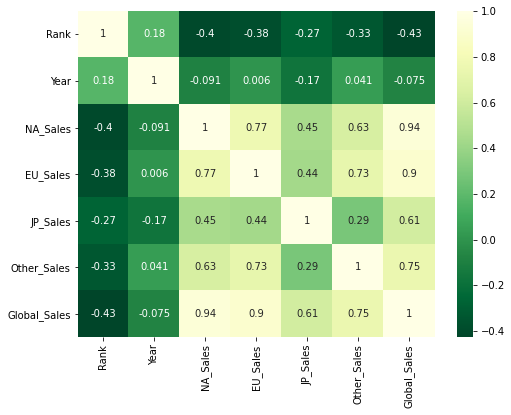

In [39]:
#
matrix = df.corr()
plt.figure(figsize=(8,6))
#plot heat map
g=sns.heatmap(matrix,annot=True,cmap="YlGn_r")

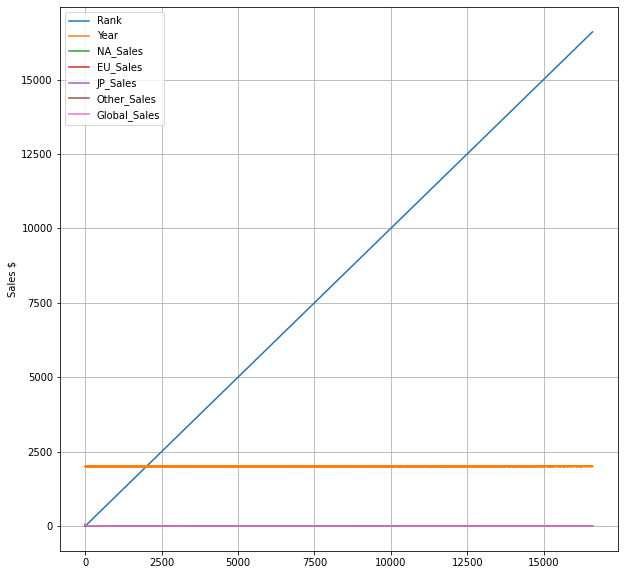

In [91]:
df.groupby(by  = 'Year').sum()
df.plot.line(figsize=(10,10), grid="on");
plt.ylabel("Sales $");

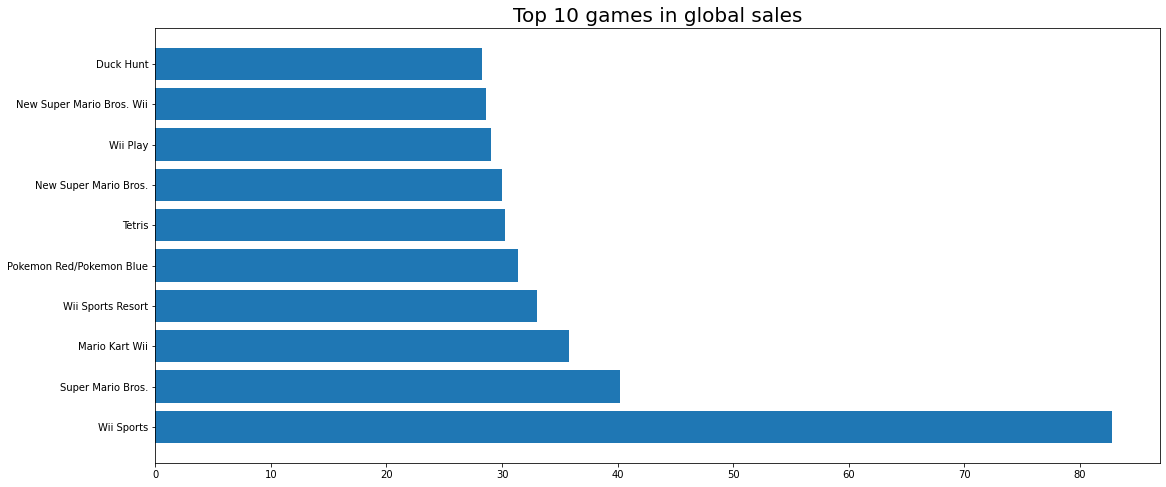

In [56]:
# Top 10 games

top_10 = df[0:10]

plt.figure(figsize = (18,8))
plt.barh(top_10["Name"],top_10["Global_Sales"])
plt.title("Top 10 games in global sales",fontdict = {"fontsize":20})
plt.savefig("top_10_games.jpg",dpi = 300)
plt.show()

Publishers

In [70]:
dfp= df["Publisher"].value_counts()
dfp.head(10)

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: Publisher, dtype: int64

In [89]:
Publisher = list(df.Publisher.unique())

In [81]:
global_sale_publisher = pd.Series(dtype = float)

for pub in Publisher :
    data = df.loc[df.Publisher == pub]
    global_sale = sum(data.Global_Sales)
    global_sale_publisher[pub] = global_sale

In [82]:
top_10_publisher = global_sale_publisher[:10]

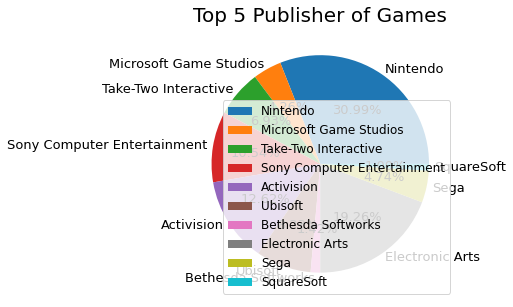

In [88]:
plt.figure(figsize = (6.5,5))
plt.pie(top_10_publisher,labels = top_10_publisher.index,autopct = "%.2f%%",textprops = {"fontsize":13},labeldistance = 1.05)
plt.legend(loc = 4,fontsize  = 12)
plt.title("Top 5 Publisher of Games",fontdict = {"fontsize":20,"fontweight":25})
plt.savefig("Top 5 Publisher of Games",dpi = 300)
plt.show()